In [2]:
## main function 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold, StratifiedKFold
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from scipy import stats
from zlib import crc32
pd.options.mode.chained_assignment = No
##K-폴드 교차검증 설정
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [4]:
# 데이터 불러오기 및 전처리
# 0. Data set split
data = pd.read_csv("traffic_1.csv",encoding='CP949')

feature_names_raw = ["acdnt_dd_dc","dfk_code","tmzon_div_1_code","occrrnc_time_code","acdnt_mcode","lrg_violt_1_code",
                     "wether_sttus_code","road_stle_code","wrngdo_vhcle_asort_code","acdnt_age_1_code","sexdstn_div_1_code",
                     "acdnt_age_2_code","sexdstn_div_2_code","rdse_sttus_code","acdnt_year","month"]
feature_names = ["spring","summer","fall","winter","mon","tue","wed","thur","fri","sat","sun",
                 "day","night","h1","h2","h3","h4","h5","h6","h7","h8","h9","h10","h11","h12",
                 "h13","h14","h15","h16","h17","h18","h19","h20","h21","h22","h23","h24",
                 "acm1","acm2","acm3","acm4","acm5","violt1","violt2","violt3","violt4",
                 "violt5","violt6","violt7","violt8","violt9","violt10","violt11","violt12",
                 "weath1","weath2","weath3","weath4","weath5","weath6",
                 "rsty1","rsty2","rsty3","rsty4","rsty5","rsty6","rsty7","rsty8","rsty9","rsty10",
                 "rsty11","rsty12","rsty13","vtype1","vtype2","vtype3","vtype4","vtype5","vtype6","vtype7","vtype8",
                 "age1","male1","female1","age2","male2","female2",
                 "rstat1","rstat2","rstat3","rstat4","rstat5","rstat6","rstat7","rstat8","rstat9"]
label_name = "y_h"
names = ["spring","summer","fall","winter","mon","tue","wed","thur","fri","sat","sun",
                 "day","night","h1","h2","h3","h4","h5","h6","h7","h8","h9","h10","h11","h12",
                 "h13","h14","h15","h16","h17","h18","h19","h20","h21","h22","h23","h24",
                 "acm1","acm2","acm3","acm4","acm5","violt1","violt2","violt3","violt4",
                 "violt5","violt6","violt7","violt8","violt9","violt10","violt11","violt12",
                 "weath1","weath2","weath3","weath4","weath5","weath6",
                 "rsty1","rsty2","rsty3","rsty4","rsty5","rsty6","rsty7","rsty8","rsty9","rsty10",
                 "rsty11","rsty12","rsty13","vtype1","vtype2","vtype3","vtype4","vtype5","vtype6","vtype7","vtype8",
                 "age1","male1","female1","age2","male2","female2",
                 "rstat1","rstat2","rstat3","rstat4","rstat5","rstat6","rstat7","rstat8","rstat9", "y_h"]
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data, data[label_name]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
train = strat_train_set[names]
test = strat_test_set[names]
X_train = strat_train_set[feature_names]
y_train = strat_train_set[label_name]
X_test = strat_test_set[feature_names]
y_test = strat_test_set[label_name]

In [23]:
# Random Forest-----------------------------------------------------------------------------------------------------------------------
# (1) 초기화
RF_ = RandomForestClassifier()
# (2) GridSearch & Parameter 찾기 (Paramter & Scorer Metric 설정)
grid_RF_m = GridSearchCV(RF_, param_grid = {
    'n_estimators': [200],
    'n_jobs': [-1],
    'random_state': [42],
    'max_depth':[10],
    'verbose': [0]
}, 
                         cv=10, scoring = scorer)
# (3) 학습
grid_RF_m.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200], 'n_jobs': [-1], 'random_state': [42], 'max_depth': [10], 'verbose': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

RandomForestClassifer
Validation
Best Parameter : {'max_depth': 10, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 42, 'verbose': 0}
Score of MLPClassifer :  0.684035715826252
정밀도 :  0.6703612982241274
재현율 :  0.8493288850958182
f1 score :  0.7493069578014305
roc_auc_score :  0.749788848101671
Evaluation
CONFUSION MATRIX
[[1067 1507]
 [ 598 2624]]
Accuracy of RandomForestClassifer :  0.6368184955141477
정밀도 :  0.63519728879206
재현율 :  0.8144009931719429
f1 score :  0.7137222902216783
roc_auc_score :  0.6838869283003361
<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=F

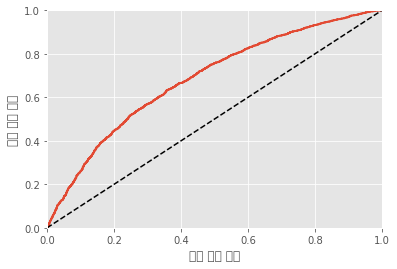

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# (4) Predition
yobs = y_test
a = grid_RF_m.predict(X_test)
b = grid_RF_m.predict(X_train)
y_scores = grid_RF_m.predict_proba(X_test)[:,1]
y_scores_m = grid_RF_m.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# (5) validation
print("RandomForestClassifer")
print("Validation")
print("Best Parameter :", grid_RF_m.best_params_)
print("Score of MLPClassifer : ", grid_RF_m.score(X_train,y_train))
print("정밀도 : ", precision_score(y_train, b))
print("재현율 : ", recall_score(y_train,b))
print("f1 score : ", f1_score(y_train,b))
print("roc_auc_score : ", roc_auc_score(y_train, y_scores_m))
# (6) Evalution 
#Confusion Matrix & feature importance
print("Evaluation")
print("CONFUSION MATRIX", confusion_matrix(y_test, a), sep = '\n')
print("Accuracy of RandomForestClassifer : ", grid_RF_m.score(X_test,y_test))
print("정밀도 : ", precision_score(y_test, a))
print("재현율 : ", recall_score(y_test,a))
print("f1 score : ", f1_score(y_test,a))
print("roc_auc_score : ", roc_auc_score(y_test, y_scores))
print(grid_RF_m.get_params)
plot_roc_curve(fpr, tpr, "RandomForestClassifer")
importances = grid_RF_m.best_estimator_.feature_importances_
print(importances)


In [25]:
y_test.to_csv("C:/acci/RandomForest/y_obs.csv")
yhat_RF = grid_RF_m.predict_proba(X_test)
pd.DataFrame(yhat_RF).to_csv("C:/acci/RandomForest/yhat.csv")
pd.DataFrame(importances).to_csv("C:/acci/RandomForest/feature_importances1.csv")